In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import umap
from sklearn.manifold import TSNE
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn import metrics
import matplotlib.patches as mpatches
import warnings
import time
warnings.filterwarnings("ignore")

We'll use the mushrooms dataset from the UCI Machine Learning Repository. http://archive.ics.uci.edu/ml/datasets/Mushroom 

"This dataset includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family Mushroom drawn from The Audubon Society Field Guide to North American Mushrooms (1981). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like "leaflets three, let it be'' for Poisonous Oak and Ivy."

In [2]:
df = pd.read_csv("mushrooms.csv")

In [3]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

There is no null value.

In [4]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


"class" feature includes "p": poisonous and "e": edible

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
class                       8124 non-null object
cap-shape                   8124 non-null object
cap-surface                 8124 non-null object
cap-color                   8124 non-null object
bruises                     8124 non-null object
odor                        8124 non-null object
gill-attachment             8124 non-null object
gill-spacing                8124 non-null object
gill-size                   8124 non-null object
gill-color                  8124 non-null object
stalk-shape                 8124 non-null object
stalk-root                  8124 non-null object
stalk-surface-above-ring    8124 non-null object
stalk-surface-below-ring    8124 non-null object
stalk-color-above-ring      8124 non-null object
stalk-color-below-ring      8124 non-null object
veil-type                   8124 non-null object
veil-color                  8124 non-null object
ring-number

In [6]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


Before moving on, we need to convert all the values to integers.

In [7]:
#convert object to integer
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for col in df.columns:
    df[col] = labelencoder.fit_transform(df[col])

df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


Let's check how many Edible and Poisonous mashrooms in this dataset.

In [8]:
print("Edible:", round(df["class"].value_counts()[0]/len(df) * 100, 2), "% of the dataset")
print("Poisonous:", round(df["class"].value_counts()[1]/len(df) * 100, 2), "% of the dataset")

Edible: 51.8 % of the dataset
Poisonous: 48.2 % of the dataset


## 1. Apply dimensionality reduction techniques to visualize the observations.

First, let' standardize the dataset

In [83]:
# Since this is unsupervised learning, we try not to use the true class information y.
X = df.ix[:, df.columns != "class"]
y = df.ix[:, df.columns == "class"]

# Standarizing the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

## Next, we apply PCA, t-SNE, and UMAP.

In [84]:
time_start = time.time()

pca = PCA(n_components=2)
pca_components = pca.fit_transform(X)

print('PCA done! Time elapsed: {} seconds'.format(time.time()-time_start))

PCA done! Time elapsed: 0.045195817947387695 seconds


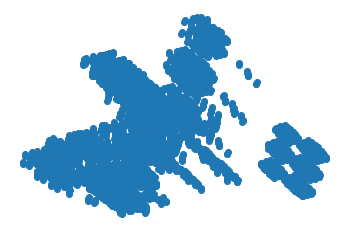

In [85]:
# Plot PCA components and clusters

plt.scatter(pca_components[:, 0],
            pca_components[:, 1],
           )
    
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

We can see some clusters in the plotting.

In [86]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(X)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 8124 samples in 0.087s...
[t-SNE] Computed neighbors for 8124 samples in 2.171s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8124
[t-SNE] Computed conditional probabilities for sample 2000 / 8124
[t-SNE] Computed conditional probabilities for sample 3000 / 8124
[t-SNE] Computed conditional probabilities for sample 4000 / 8124
[t-SNE] Computed conditional probabilities for sample 5000 / 8124
[t-SNE] Computed conditional probabilities for sample 6000 / 8124
[t-SNE] Computed conditional probabilities for sample 7000 / 8124
[t-SNE] Computed conditional probabilities for sample 8000 / 8124
[t-SNE] Computed conditional probabilities for sample 8124 / 8124
[t-SNE] Mean sigma: 0.779114
[t-SNE] KL divergence after 250 iterations with early exaggeration: 58.812126
[t-SNE] KL divergence after 300 iterations: 1.689408
t-SNE done! Time elapsed: 19.682735919952393 seconds


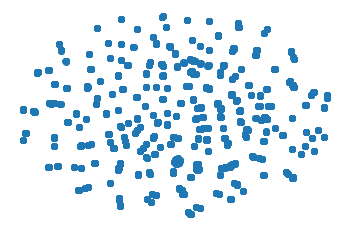

In [87]:
plt.scatter(tsne_results[:, 0],
            tsne_results[:, 1],
           )
    
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

t-SNE seems not working well.

In [88]:
time_start = time.time()

umap_results = umap.UMAP(n_neighbors=5,
                      min_dist=0.3,
                      metric='correlation').fit_transform(X)

print('UMAP done! Time elapsed: {} seconds'.format(time.time()-time_start))

UMAP done! Time elapsed: 8.621248006820679 seconds


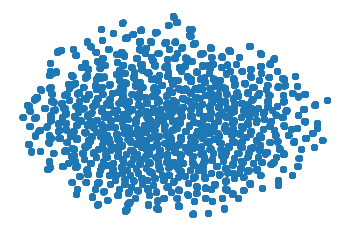

In [89]:
plt.scatter(umap_results[:, 0],
            umap_results[:, 1],)
    
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

UMAP also didn't work well.
It looks like there wass no great performance dimensionality reduction, but PCA is the best one.

## 2. Apply clustering techniques to group together similar observations.

To plot in two-dimensional space, we need to reduce our data dimensionality. For this purpose, we apply PCA because it worked the best.

## K-means

96.4 ms ± 3.98 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


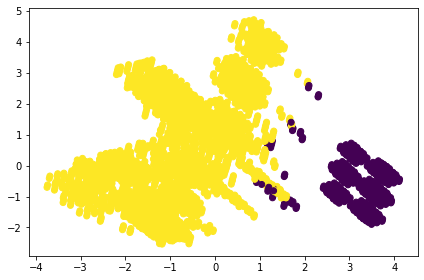

In [101]:
# Defining the k-means
kmeans_cluster = KMeans(n_clusters=2, random_state=123)

# Fit model
%timeit kmeans_cluster.fit(X)
kmeans_cluster = kmeans_cluster.predict(X)

# Plot the solution.
plt.scatter(pca_components[:, 0],
            pca_components[:, 1],
            c=kmeans_cluster,
            cmap='viridis')
    
plt.tight_layout()
plt.show()

In [102]:
print("Silhouette score for two cluster k-means: {}".format(metrics.silhouette_score(X, kmeans_cluster, metric='euclidean')))

Silhouette score for two cluster k-means: 0.1737062653110604


There are clear two clusters, but the score is not so good.

## Agglomerative clustering

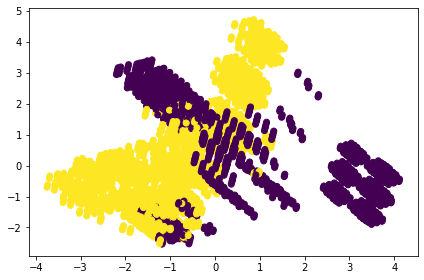

In [94]:
# Defining the agglomerative clustering
agg_cluster = AgglomerativeClustering(linkage='complete', 
                                      affinity='cosine',
                                      n_clusters=2)

# Fit model
agg_cluster = agg_cluster.fit_predict(X)


# Plot the solution.
plt.scatter(pca_components[:, 0],
            pca_components[:, 1],
            c=agg_cluster,
            cmap='viridis')
    
plt.tight_layout()
plt.show()

Below, we sketch the dendrogram using the complete linkage method.

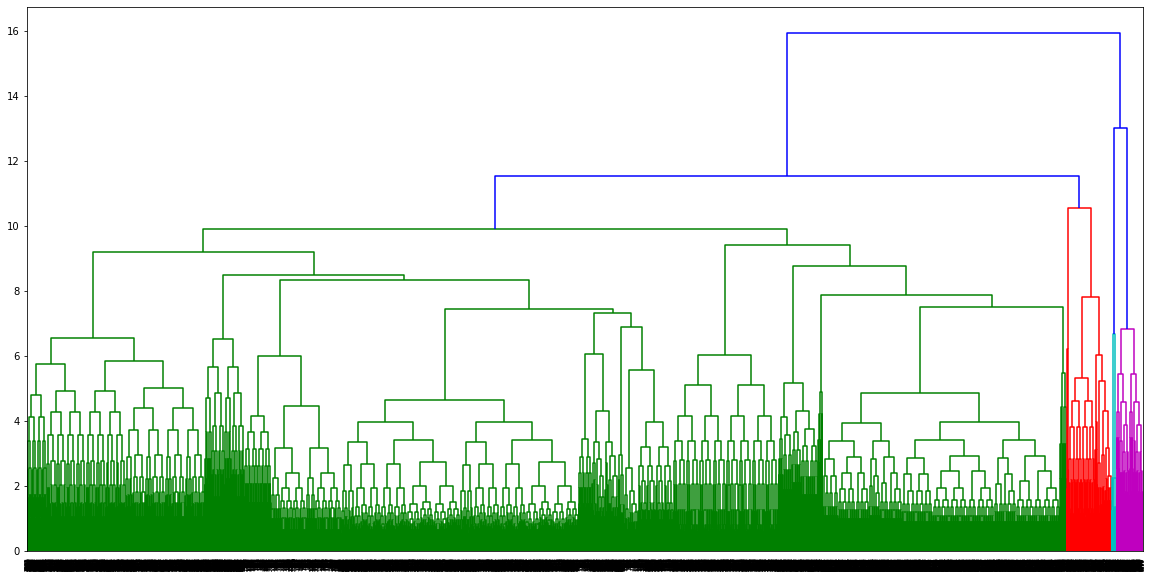

In [95]:
plt.figure(figsize=(20,10))
dendrogram(linkage(X, method='complete'))
plt.show()

In [96]:
print("The silhoutte score of the Agglomerative Clustering solution: {}"
      .format(metrics.silhouette_score(X, agg_cluster, metric='euclidean')))

The silhoutte score of the Agglomerative Clustering solution: 0.15046959611694466


It seems like AGG is not working well. The score is lower than K-means.

## DBSCAN

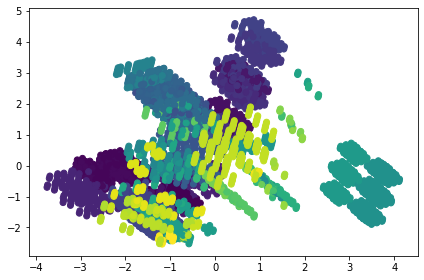

In [97]:
# Defining the agglomerative clustering
dbscan_cluster = DBSCAN(eps=2, min_samples=5,metric="euclidean")

# Fit model
db_cluster = dbscan_cluster.fit_predict(X)


# Plot the solution.
plt.scatter(pca_components[:, 0],
            pca_components[:, 1],
            c=db_cluster,
            cmap='viridis')
    
plt.tight_layout()
plt.show()

In [98]:
print("The silhoutte score of the DBSCAN solution: {}"
      .format(metrics.silhouette_score(X, db_cluster, metric='euclidean')))

The silhoutte score of the DBSCAN solution: 0.3399888114128776


The score is the best so far. However, there are several clusters. Since we want to distinguish edible and poisonous, we'll avoid using DBSCAN.

## GMM

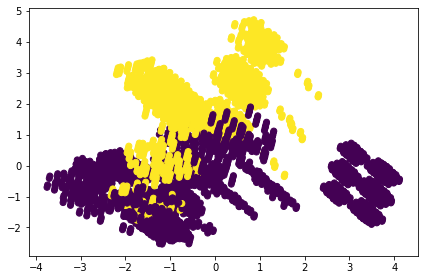

In [99]:
# Defining the agglomerative clustering
gmm_cluster = GaussianMixture(n_components=2, random_state=123)

# Fit model
gmm_cluster = gmm_cluster.fit_predict(X)

# Plot the solution.
plt.scatter(pca_components[:, 0],
            pca_components[:, 1],
            c=gmm_cluster,
            cmap='viridis')
    
plt.tight_layout()
plt.show()

In [100]:
print("The silhoutte score of the GMM solution: {}"
      .format(metrics.silhouette_score(X, gmm_cluster, metric='euclidean')))

The silhoutte score of the GMM solution: 0.1351294478785735


All of the clustering method didn't work well. K-means had the good silhoutte score and right number of clusters. We'll use K-means for the next part. 

## Neural Network

We'll create a multi-layer perceptron neural network model. We'll compare this model to either a boosted tree or a random forest model and describe the relative tradeoffs between complexity and accuracy. 

In [43]:
# Import model
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score

In [103]:
# Establish and fit with single, 100 perceptron layer 
mlp = MLPClassifier(hidden_layer_sizes=(100,))
mlp.fit(X,kmeans_cluster)

#Cross validate and get scores
cross_val_score(mlp, X, kmeans_cluster, cv=5)

array([0.96494465, 1.        , 1.        , 0.99876847, 0.87992611])

The scores are very high. Let's compare the scores with the true class information.

In [104]:
# Establish and fit with single, 100 perceptron layer 
mlp = MLPClassifier(hidden_layer_sizes=(100,))
mlp.fit(X,y)

#Cross validate and get scores
cross_val_score(mlp, X, y, cv=5)

array([0.84255843, 1.        , 0.97169231, 1.        , 0.62130542])

There are some differences, but overall, our model is working very good.
Next, let's try random forest.

## Random Forest

In [50]:
# Import model
from sklearn import ensemble
from sklearn.model_selection import GridSearchCV

In [105]:
# Initialize model
forest = ensemble.RandomForestClassifier(
    max_features='sqrt',
)

# Set hyperparameter
max_depth = dict(max_depth = np.arange(1,10,1))

# Set up grid search for forest depth
grid = GridSearchCV(forest, max_depth, cv=5)

# Fit and get results
results = grid.fit(X, kmeans_cluster)
results.best_estimator_.get_params()['max_depth']

2

In [106]:
forest = ensemble.RandomForestClassifier(
    max_features="sqrt",
    max_depth=2)

cross_val_score(forest, X, kmeans_cluster, cv=5)

array([0.96309963, 1.        , 1.        , 1.        , 0.77586207])

This also worked very well. 

In [124]:
X = df.ix[:, df.columns != "class"]

forest.fit(X,kmeans_cluster)

forest_features = pd.DataFrame()
forest_features["importance"] = forest.feature_importances_
forest_features["feature"] = X.columns

forest_features.sort_values("importance", ascending=False).head()

,importance,feature
8,0.417599,gill-color
10,0.188734,stalk-root
19,0.104243,spore-print-color
18,0.070948,ring-type
4,0.063541,odor


It seems like gill-color is the most important features. 

Next, let's compare the scores with the true class information.

In [119]:
# Initialize model
forest = ensemble.RandomForestClassifier(
    max_features='sqrt',
)

# Set hyperparameter
max_depth = dict(max_depth = np.arange(1,10,1))

# Set up grid search for forest depth
grid = GridSearchCV(forest, max_depth, cv=5)

# Fit and get results
results = grid.fit(X, y)
results.best_estimator_.get_params()['max_depth']

9

In [125]:
forest = ensemble.RandomForestClassifier(
    max_features="sqrt",
    max_depth=9)

cross_val_score(forest, X, kmeans_cluster, cv=5)

array([0.96309963, 1.        , 1.        , 0.99876847, 0.97598522])

It also worked well.

## Conclusion

Dimensionality reduction techniques and clustering techniques didin't work well, but by using neural network, we successfully improved the model significantly.